In [1]:
import nltk
from nltk import *
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#The first 46 lines of the file are descriptions
#The data is from line 47 onward and has the format
#WORD EMOTION 1/0 (1 if the emotion is associated with the word, 0 otherwise)
def get_nrc_data():
    nrc = "/Users/rohankulkarni/nltk_data/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
    f = open(nrc,'r')
    #Creates a list of lists, each sublist is [WORD, EMOTION] if the emotion was 1
    alllines = [[line.strip().split('\t')[0],line.strip().split('\t')[1]] for i,line in enumerate(f) if i>=46 and (line.strip().split('\t'))[2]=="1"]

    #Make a dictionary with elements:
    # WORD : [e1,e2,..]
    
    from collections import defaultdict
    d = defaultdict(list)
    for k, v in alllines: #will unpack WORD, EMOTION pairs
        d[k].append(v) #Will append the emotion (v) to the list of emotions for the word (k)
    
    return dict(d) #make it into a dict and return it


In [3]:
emotion_dict = get_nrc_data()
emotion_dict

{'abandonment': ['sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sadness'],
 'absence': ['fear', 'negative', 'sadness'],
 'absent': ['negative', 'sadness'],
 'absentee': ['negative', 'sadness'],
 'absenteeism': ['negativ

<h1> Get Message PDF, Transcribe, and Clean </h1>

In [4]:
#get message transcript
# importing required modules
import PyPDF2

# creating a pdf file object
pdfFileObj = open('./mambas-transcript.pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# printing number of pages in pdf file
print(pdfReader.numPages)

# creating a page object

# extracting text from page
allwords = []
alltext = ""

for i in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(i)
    message_page = pageObj.extractText()

    #delete occurences of the "Reply" imessage feature
    message_page = message_page.replace("Reply", "")
    
    #delete occurences of numbers
    for num in range(0,10):
        num = str(num)
        message_page = message_page.replace(num, "")
    
    #delete punctuation and special characters
    message_page = message_page.replace("?", " ")
    message_page = message_page.replace("!", " ")
    message_page = message_page.replace(".", " ")
    message_page = message_page.replace(":", " ")
    message_page = message_page.replace(",", " ")
    message_page = message_page.replace("^", " ")
    message_page = message_page.replace("+", " ")
    message_page = message_page.replace("-", " ")
    message_page = message_page.replace("\"", " ")
    message_page = message_page.replace("“", " ")
    message_page = message_page.replace("’", "")
    
    #lowercase all words
    message_page=message_page.lower()
    
    #add spaces between names to separate them out if not pulled correctly
    #also allcaps these to note that they are people talking/being talked about
    #contact names:
    message_page = message_page.replace("vaibhav", " VAIBHAV ") 
    message_page = message_page.replace("davis smith", " DAVIS ")
    message_page = message_page.replace("luke xue", " LUKE ")
    message_page = message_page.replace("rishi kosna", " RISHI ")
    message_page = message_page.replace("sammy", " SAMMY ")
    message_page = message_page.replace("david lee", " DAVID ")
    #by name:
    message_page = message_page.replace("davis", " DAVIS ")
    message_page = message_page.replace("luke", " LUKE ")
    message_page = message_page.replace("rishi", " RISHI ")
    message_page = message_page.replace("david", " DAVID ")
    
    #delete remnants of timestamps
    days = ["sun", "mon", "tue", "wed", "thu", "fri", "sat"]
    days_full = ["sunday", "monday", "tuesday", "wednesday", "thursday", "friday", "saturday"]
    mos = ["sep", "oct", "nov", "dec"] #Fall semester
    timeAMPM = ["am", "pm"] #Fall semester

    time_total = zip(days, days_full, mos, timeAMPM)
    
    for day, day_full, mo, ampm in list(time_total):
        message_page = message_page.replace(day, "")
        message_page = message_page.replace(day_full, "")
        message_page = message_page.replace(mo, "")
        message_page = message_page.replace(ampm, "")
    
    allwords.extend(word_tokenize(message_page))
    alltext+= " " + message_page

# closing the pdf file object
pdfFileObj.close()


354


In [1]:
#allwords

In [2]:
#alltext

In [3]:
s=pd.Series(allwords)
#s

NameError: name 'pd' is not defined

<h1> Emotion Analysis </h1>

In [8]:
def document_emotion_analyzer(text):
    #Imports
    from nltk import word_tokenize #Generates word tokens by dealing with punctuation
    
    #Set up the result dictionary
    #Initialize the count for each emotion to zero (note the set notation)
    emotion_count = {x:0 for y in emotion_dict.values() for x in y}    

    #word_tokenize returns punctuation as separate tokens, get rid of them!
    words = [word for word in word_tokenize(text) if word.isalpha()] #Split the text into words
    
    #Iterate through the tokens adding one/number of words for each emotion associated with the word
    for word in words:
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(words)
    return emotion_count


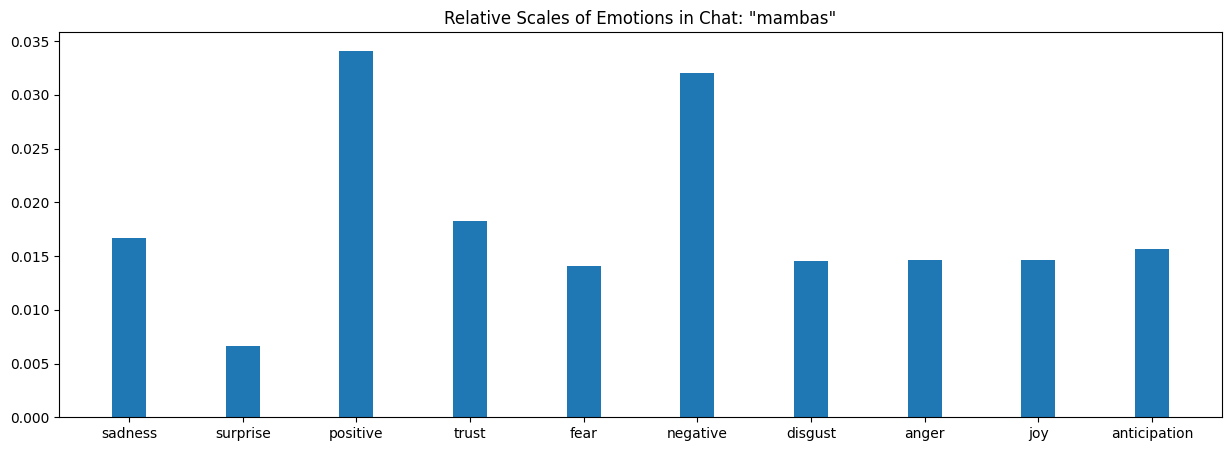

In [9]:
emotion_results = document_emotion_analyzer(alltext)
names = list(emotion_results.keys())
values = list(emotion_results.values())

plt.figure(figsize=(15, 5)) 
plt.bar(range(len(emotion_results)), values, tick_label=names, width=0.3)

plt.title("Relative Scales of Emotions in Chat: \"mambas\"")
plt.show()

<h1> Most Frequent Words </h1>

In [10]:
allwords_series = pd.Series(allwords)
word_freq = pd.DataFrame(allwords_series.value_counts(normalize=True))

<h3> Who's talking the most OR the most talked about? </h3>


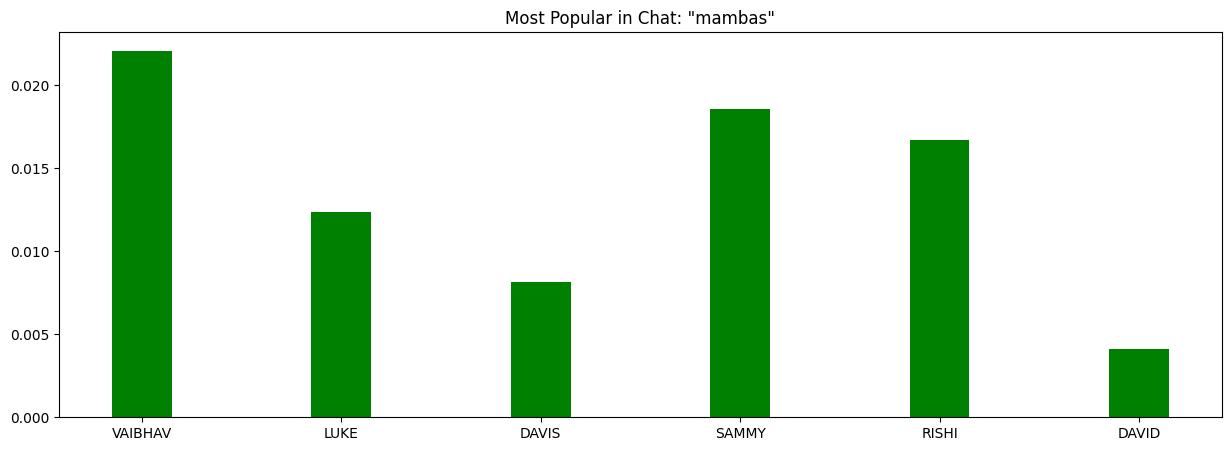

In [11]:
people_freq = word_freq.loc[["VAIBHAV", "LUKE", "DAVIS", "SAMMY", "RISHI", "DAVID"], :]

plt.figure(figsize=(15, 5)) 
plt.bar(range(len(people_freq)), people_freq.values.flatten(), \
        tick_label=list(people_freq.index), width=0.3, color="green")

plt.title("Most Popular in Chat: \"mambas\"")
plt.show()

<h3> What relevant words are most used? </h3>


In [12]:
swords = corpus.stopwords.words('english')
for i in range(0, len(swords)):
    swords[i] = swords[i].replace("\'", "")

In [13]:
relevant = word_freq.drop(index=list(people_freq.index))
relevant = relevant.drop(index="rohan") #need to account for myself
relevant = relevant.drop(swords, errors="ignore")
#word_freq.drop(index=corpus.stopwords.words('english'))
relevant=relevant.sort_values(by=0, ascending=False).reset_index().rename(columns={"index":"word", 0:"value"})

In [14]:
def drop_less3(x):
    if len(x.word) <=2:
        return 1
    else:
        return 0
relevant = relevant.assign(less3=relevant.apply(drop_less3, axis=1))

In [15]:
relevant=relevant.loc[~(relevant.less3==1), :].drop(columns="less3").reset_index(drop=True)

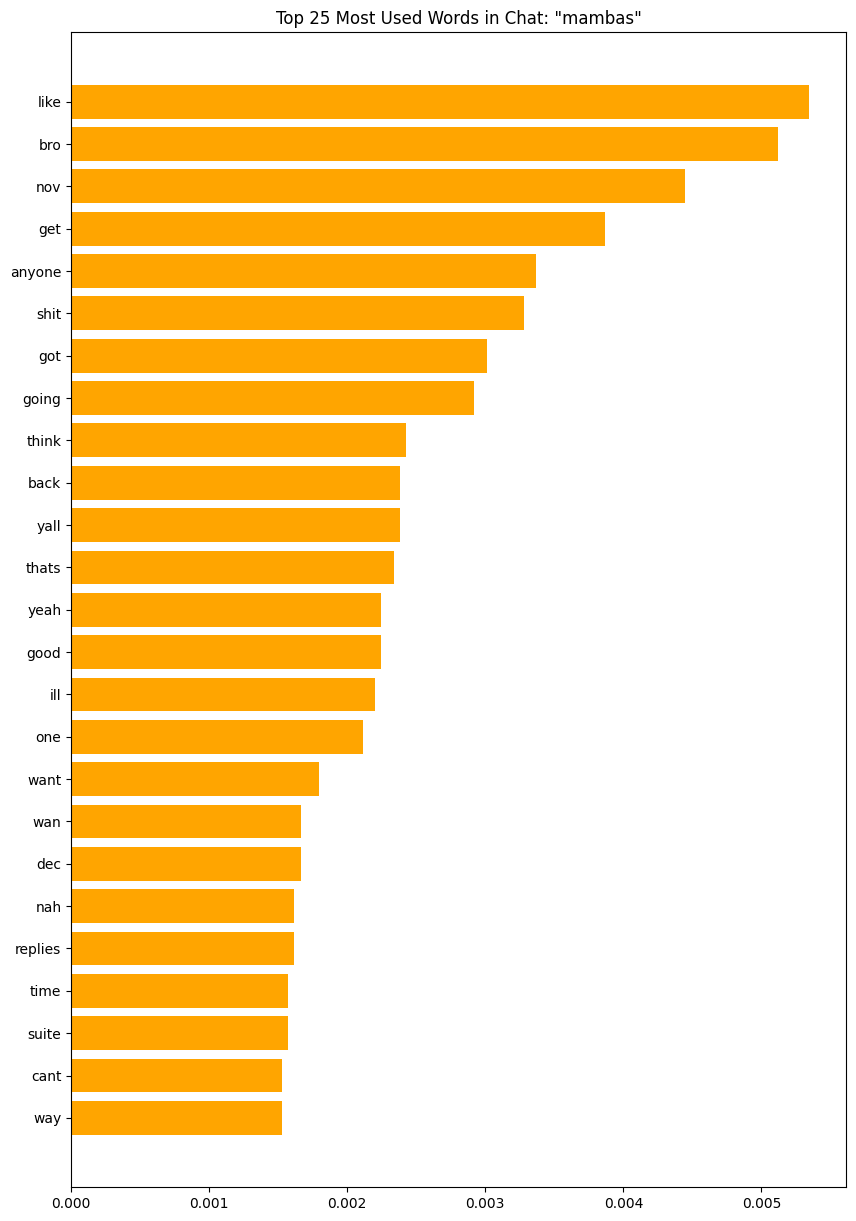

In [16]:
top25=relevant.head(25)

plt.figure(figsize=(10, 15)) 
plt.barh(range(len(top25)), top25.value, \
        tick_label=list(top25.word), color="orange")
plt.gca().invert_yaxis()

plt.title("Top 25 Most Used Words in Chat: \"mambas\"")
plt.show()